<a href="https://colab.research.google.com/github/HaydenJF/CPSC392-HW3/blob/main/HW3_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3

## GENERAL INSTRUCTIONS:

- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset [HW4_1](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv),

- **a) (15 points)** Build a Linear Regression Model to predict `y` from all the `X` variables (`X1` to `X50`).
    - Use TTS with a 90/10 split (since data is large)
    - z-score your predictors
    - record the MSE/R2 for both training/test sets
    
    
    
- **b) (10 points)** Thouroughly discuss the performance of the model built in part a. (*IN A MARKDOWN CELL*)



- **c) (35 points)** Build a NEW Linear Regression Model, but using PCA:
    - Using the same train/test split from a...
    - z-score your predictors (if not already z scored)
    - apply PCA to the *training set*.
    - make a scree plot
    - (15 of 35 points) **Thouroughly discuss** what the scree plot tells you about the raw/original `X` variables and their relationships to each other (this is NOT asking about the relationship between the Principal Components, but the raw/original variables). (*IN A MARKDOWN CELL*)
    - Figure out how many PCs you need to keep to retain 90% of the original variance.
    - Use the fitted PCA model to create those component scores for both *training* and *test* set. DO NOT refit the PCA model on the test set.
    - fit your model using these components and record the MSE/R2 for both training/test sets
    
    
- **d) (20 points)** Thouroughly discuss how the performance of the model built in part c differs from the model in part a. In your answer, discuss how PCA works, and how that may relate to the change in performance you observed. Also discuss why z-scoring before applying PCA is important.(*IN A MARKDOWN CELL*)



- **e) (20 points)** Thouroughly discuss whether *for this data set* you would choose to use the full data, or the Principal Components selected in part c, what are the advantages/disadvantages? (*IN A MARKDOWN CELL*)

In [31]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.decomposition import PCA #PCA


%matplotlib inline

Using the dataset [HW4_1](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv)

In [37]:
db = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv")
db.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,y
0,0.384149,1.111962,0.373605,0.917501,1.134492,0.960647,0.627464,0.958256,0.471226,0.642484,...,0.088335,0.345949,-0.368745,-0.445129,-0.010879,-0.271876,-0.394958,-0.146254,-0.476075,24.470958
1,0.840275,0.012389,0.970561,0.051327,0.708077,0.527206,0.696664,0.722517,1.380874,0.959594,...,0.563963,0.123787,0.042312,0.361144,-0.192868,0.213551,-0.507160,0.472163,0.346417,29.350043
2,-0.524459,0.171770,-0.352452,-0.832353,-0.427443,-0.295201,-0.692488,0.101357,-0.200059,-0.515774,...,-1.647765,-1.107207,-1.380130,-0.937277,0.007752,-1.425836,-0.724967,-1.823506,-1.507816,-75.143042
3,-0.651513,-1.076732,-0.689102,0.022812,-1.030788,-0.507673,-1.708206,-0.862988,-0.821164,-0.726695,...,1.686901,1.402889,0.464069,1.226353,0.655251,1.304203,1.128789,1.228063,0.905470,11.952432
4,-0.473348,0.064595,0.058449,0.401638,0.078103,-1.110774,0.230972,0.107108,0.130277,0.373338,...,1.068410,0.375697,1.329678,1.857105,0.891412,1.715978,1.707637,1.250494,1.241173,61.165560


- **a) (15 points)** Build a Linear Regression Model to predict `y` from all the `X` variables (`X1` to `X50`).
    - Use TTS with a 90/10 split (since data is large)
    - z-score your predictors
    - record the MSE/R2 for both training/test sets

In [33]:
predictors = db.columns.values.tolist()
predictors.remove("y")

X_train, X_test, y_train, y_test = train_test_split(db[predictors],db["y"], 
                                                    test_size = 0.1,
                                                    random_state = 42)

z = StandardScaler()

z.fit(X_train[predictors])

X_train[predictors] = z.transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

lr = LinearRegression()

lr.fit(X_train, y_train)

#train
print("Train MSE")
print(mean_squared_error(y_train, lr.predict(X_train)))

print("Train R2")
print(r2_score(y_train, lr.predict(X_train)))

print()

#test
print("Test MSE")
print(mean_squared_error(y_test, lr.predict(X_test)))

print("Test R2")
print(r2_score(y_test, lr.predict(X_test)))

Train MSE
3.890808833753499
Train R2
0.9990662611790446

Test MSE
4.224746399323704
Test R2
0.9989885595381957


- **b) (10 points)** Thouroughly discuss the performance of the model built in part a. (*IN A MARKDOWN CELL*)

b)

The train and test set did exceptionally well.  Not only is the mean squared error pretty low (~4 is about 2x2 if you want to visualize it) but the R2 scores are unbelievable.  A 0.999 and 0.9989 is beyond impressive.  This also shows that there is almost no overfitting.  In some of the random tests I did the test R2 was actually greater than the train R2!

- **c) (35 points)** Build a NEW Linear Regression Model, but using PCA:
    - Using the same train/test split from a...
    - z-score your predictors (if not already z scored)
    - apply PCA to the *training set*.
    - make a scree plot



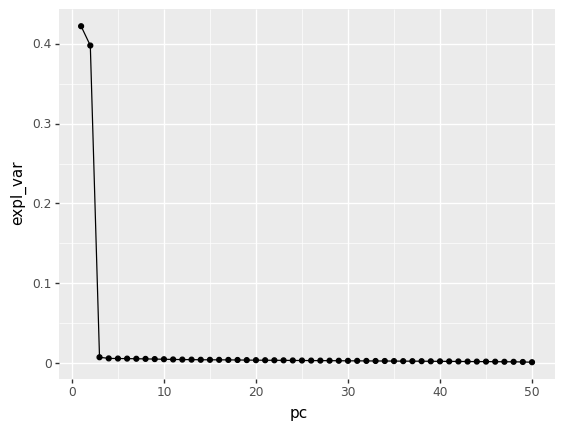

<ggplot: (8772398711173)>


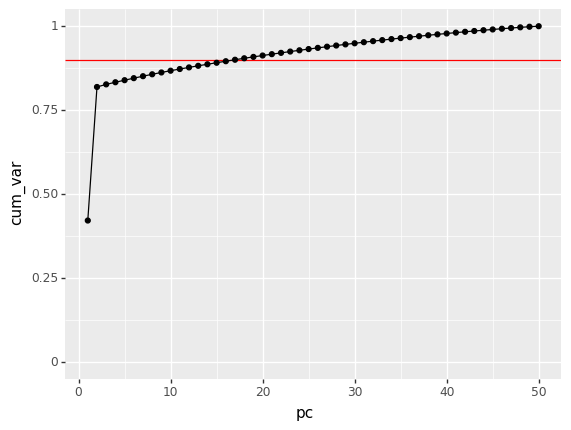

<ggplot: (8772398725957)>


In [59]:
# c
pca = PCA()

pca.fit(X_train)

pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,51),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) 
      + geom_line() + geom_point())
print(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) 
      + geom_hline(yintercept = 0.90, color = "red")
      + geom_line() + geom_point() + ylim(0, 1))

- (15 of 35 points) **Thouroughly discuss** what the scree plot tells you about the raw/original `X` variables and their relationships to each other (this is NOT asking about the relationship between the Principal Components, but the raw/original variables). (*IN A MARKDOWN CELL*)

c)

The raw variables have two extremely similar characteristics (or dimensions).  These characteristics make up 80 percent of the variance.  The rest of the variance is made up of smaller (very similar in size) characteristics/dimensions.  Technically, the farthest characteristic leads to less variation than the nearest but they are so similar that it almost looks linear.  

  - Figure out how many PCs you need to keep to retain 90% of the original variance.
  - Use the fitted PCA model to create those component scores for both *training* and *test* set. DO NOT refit the PCA model on the test set.
  - fit your model using these components and record the MSE/R2 for both training/test sets

In [63]:
print(pcaDF["cum_var"][0:17])

0     0.421671
1     0.819194
2     0.826914
3     0.833213
4     0.839348
5     0.845377
6     0.851227
7     0.856926
8     0.862351
9     0.867601
10    0.872591
11    0.877419
12    0.882182
13    0.886773
14    0.891294
15    0.895805
16    0.900231
Name: cum_var, dtype: float64


In [74]:
pcomps = pca.transform(X_train)
pcomps = pd.DataFrame(pcomps[:,0:17])

pcomps2 = pca.transform(X_test)
pcomps2 = pd.DataFrame(pcomps2[:,0:17])


lr_pca = LinearRegression()
lr_pca.fit(pcomps, y_train)

#train
print("Train MSE")
print(mean_squared_error(y_train, lr_pca.predict(pcomps)))

print("Train R2")
print(r2_score(y_train, lr_pca.predict(pcomps)))

#test
print("Test MSE")
print(mean_squared_error(y_test, lr_pca.predict(pcomps2)))

print("Test R2")
print(r2_score(y_test, lr_pca.predict(pcomps2)))


Train MSE
33.640264260137435
Train R2
0.991926814698684
Test MSE
42.03229401095346
Test R2
0.9899371089180778


- **d) (20 points)** Thouroughly discuss how the performance of the model built in part c differs from the model in part a. In your answer, discuss how PCA works, and how that may relate to the change in performance you observed. Also discuss why z-scoring before applying PCA is important.(*IN A MARKDOWN CELL*)

d)
The model did much better in part a compared to part c.  This is because we decided to only use the 17 most variant dimensions in order to cover 90 percent of the variation in all the data.  This would generally be used to save time.  However, because the increase in variation per data point is pretty linear from dimension 3 onward we still missed out on some key dimensionality that could have been used to help our model.  I think the MSE shows this best.  For Train/Test in part a the model was 3.9 and 4.2 where in part c it was 33.6 and 42.0.

P.S.  We need z-scoring so we can compare dimenionality.  If we didn't z-score then bigger variables will effect the dimension more than smaller variables even if the bell curves are similar.

- **e) (20 points)** Thouroughly discuss whether *for this data set* you would choose to use the full data, or the Principal Components selected in part c, what are the advantages/disadvantages? (*IN A MARKDOWN CELL*)

e)
I think that the full data set is perfectly fine for what we are doing.  The data was run extremely fast (less than a second) so there is no real reason to use PCA for this program.  We basically traded off microseconds of time for 1 percent accuracy.  In massive datasets this could be important but for this program it was not neccesary.

Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
